# DNV GL RP-C205
## 2.3 Wind modelling
### 2.3.1 Mean wind speed

#### 2.3.1.1
Weibull distribution 
See 2.3.3.1

#### 2.3.1.2 

Weibull distribution can be assumed for arbitrary 10-minute mean wind speed U<sub>10</sub>

A: scale parameter
k: shape parameter

Both are site- and height-dependent

Three parameter Weibull distribution may provded more felxibility and a better fit to data.

$\gamma$ is the location parameter.

Following script is from  [Risk Engineering: Analyzing weather data¶](https://risk-engineering.org/notebook/data-analysis-weather.html)


In [3]:
import numpy
import scipy.stats
import pandas
import matplotlib.pyplot as plt
plt.style.use("bmh")

In [4]:
data = pandas.read_csv("https://risk-engineering.org/static/data/TLS-weather-data-2013.csv")
data.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-1-1,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-1-2,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2,2013-1-3,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
3,2013-1-4,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-1-5,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306


Text(0.5, 0, 'Mean wind speed (km/h)')

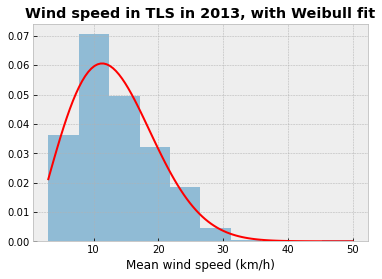

In [21]:
wind = data["Mean Wind SpeedKm/h"]
p0, p1, p2 = scipy.stats.weibull_min.fit(wind, floc=0)
plt.hist(wind, density=True, alpha=0.5)
support = numpy.linspace(wind.min(), wind.max(), 100)
plt.plot(support, scipy.stats.weibull_min.pdf(support, p0, p1, p2), "r-", lw=2)
plt.title("Wind speed in TLS in 2013, with Weibull fit", weight="bold")
plt.xlabel("Mean wind speed (km/h)")

KstestResult(statistic=0.10271843796037439, pvalue=0.0008323398083244365)

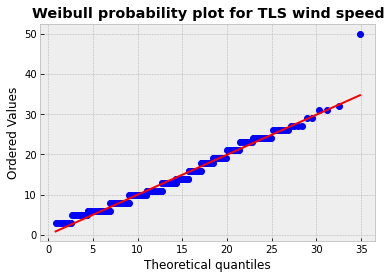

In [22]:
scipy.stats.probplot(wind, dist=scipy.stats.weibull_min(p0, p1, p2), 
                     plot=plt.figure().add_subplot(111))
plt.title("Weibull probability plot for TLS wind speed", weight="bold")
scipy.stats.kstest(wind, "weibull_min", args=(p0, p1, p2))

Text(0.5, 0, 'Mean wind speed (km/h)')

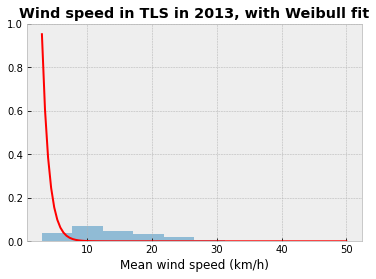

In [23]:
## with location = 3 explicitly defined in the fitting function.
p0, p1, p2 = scipy.stats.weibull_min.fit(wind2, floc=3)
plt.hist(wind, density=True, alpha=0.5)
support = numpy.linspace(wind.min(), wind.max(), 100)
plt.plot(support, scipy.stats.weibull_min.pdf(support, p0, p1, p2), "r-", lw=2)
plt.title("Wind speed in TLS in 2013, with Weibull fit", weight="bold")
plt.xlabel("Mean wind speed (km/h)")

KstestResult(statistic=0.8768139560748485, pvalue=0.0)

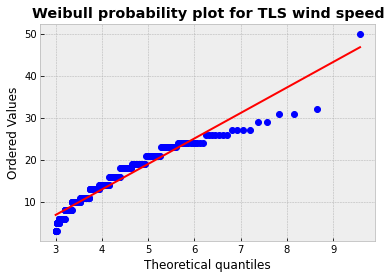

In [24]:
scipy.stats.probplot(wind, dist=scipy.stats.weibull_min(p0, p1, p2), 
                     plot=plt.figure().add_subplot(111))
plt.title("Weibull probability plot for TLS wind speed", weight="bold")
scipy.stats.kstest(wind, "weibull_min", args=(p0, p1, p2))

#### 2.3.1.3 Hurricane data

#### 2.3.1.4 sampling schemes

#### 2.3.1.5 U<sub>10</sub> is the basis of F<sub>U10</sub>(u) for U<sub>10</sub>

#### 2.3.1.6 The distribution of the annual maximum 10-minute mean wind speed U<sub>10,max</sub> can be approximated by

F<sub>u10,max 1 year </sub>(u) = (F<sub>U10</sub>(u))<sup>N</sup>

N = 52 560 and N = 52595 in leap years